<a href="https://colab.research.google.com/github/dongchanlim/Python-Machine-Learning/blob/main/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Garbage Detection Project

- Name: Dongchan Lim (Richard)
- Data: Garbage Classification Data
(https://www.kaggle.com/asdasdasasdas/garbage-classification)

## Introduction

As environmental conservation has been arose nowadays, there is a need for classifying types of trash within the dumpster and dispose them depending on the type. Waste Managment comes to critical issue for human condition. According to Rubicon, the average United States resident creates over 4 pounds of trash per day and up to 56 tons of trash per year. The main problem is that recovery rate for recycling (including composting) was only 35.2 percent in 2017. We dumb the trash and forget about our future to handle our left. This brings out my question. What can we do in terms of data science?

Neural Network Algorithm can be used broadly in various fields, both in supervised and unsupervised learning. People are trying to apply Neural Network to benefit the world in many cases. 

CNN, represented for Convolutional Neural Network is specialized for image processing and image classification. My dataset consists of about 2400 images of 6 different types of garbage. Our goal is to make prediction model based on their image and make correct clssification out of them. This technique will be beneficial for societies to set a guide on recycling industies definitely.

In [ ]:
# import convolutionaly image classification library
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


import tensorflow as tf
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


Data Source is made up of zipped forder containing multiple data together so that I need to unzip the file first. 



In [ ]:
# unzip the zipped file
!unzip '/content/81794_189983_bundle_archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard161.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

## Data Preparation

I decided to conduct CNN algorithm since it is the most popular one for image classification. CNN assume the input data to be images. The big idea behind CNNs is that a local understanding of an image is good enough. Neural Networks is one of subcategories of Deep Learning. Deep learning refers to usage of multiple hidden layers that can train increasingly abstract perspectives of the input data. Deep learning has led to major advances in computer vision.

### Description of Dataset

All of data is `jpg` format which is widely used compressed image format for containing digital images. base directory of files start within "Garbage classification/Garbage classification". And there are 6 folders of garbage types inside of it.

In [ ]:
# count the list of total images 

base_dir = "Garbage classification/Garbage classification"

# gather all of image into variable image_files
image_files = glob.glob(os.path.join(base_dir, "*/*.jpg"))

len(image_files)

2527

In [ ]:
os.listdir(base_dir)

['metal', 'cardboard', 'plastic', 'glass', 'trash', 'paper']

Since my dataset consists of thousands of jpg.file, I need to change them into pixel-based arrays first. I'm going to use `numpy` `to_array` function to change the image into pixel-based array.

In [ ]:
sample = load_img(image_files[1])
sample_array = img_to_array(sample)
# sample_array = np.asarray(sample)
sample_array.shape

(384, 512, 3)

it seems like one image file can be represented by 3 dimensional array.

I just figured out the number of garbage image samples is 2527. But there are each categorized folders containing different type of garbage such as glass, plastic, paper and so on. I want to visualize each of category by sampling out 6 images and show 2 x 3 image grid for each category. 

In [ ]:
plt.figure(figsize=(20, 20))

# make a function to show the 6 images of each clssification
def show_image_sample(img_class):
  for index, img_path in enumerate(glob.glob(os.path.join(base_dir,  img_class, "*.jpg"))[:6]):
    img = load_img(img_path)
    plt.subplot(2, 3, index + 1)
    plt.imshow(img)

<Figure size 1440x1440 with 0 Axes>

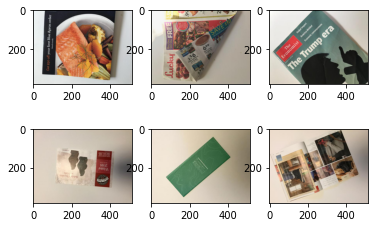

In [ ]:
show_image_sample(os.listdir(base_dir)[0])

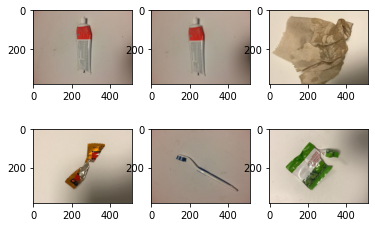

In [ ]:
show_image_sample(os.listdir(base_dir)[1])

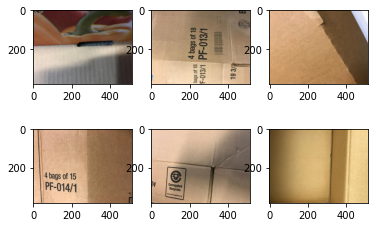

In [ ]:
show_image_sample(os.listdir(base_dir)[2])

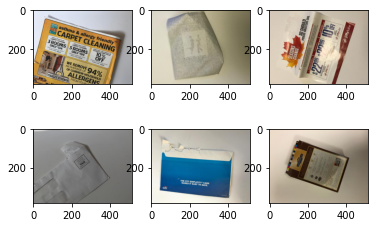

In [ ]:
show_image_sample(os.listdir(base_dir)[3])

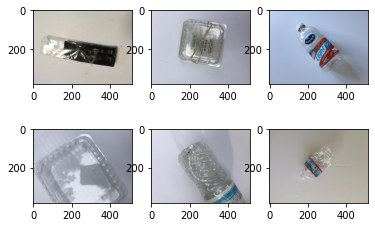

In [ ]:
show_image_sample(os.listdir(base_dir)[4])

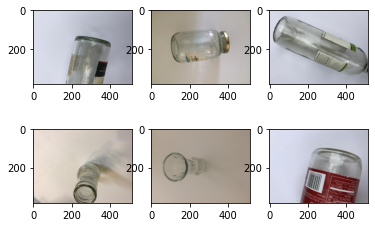

In [ ]:
show_image_sample(os.listdir(base_dir)[5])

There are 6 classes for garbages per folder within base directory. (Metal, Trash, Carboard, Paper, Plastic, Glass). I would like to count each of class and check if sample is prorperly balanced to model.

In [ ]:
# count the list of each class images 
for i in os.listdir(base_dir):
  print(i,": ",len(glob.glob(os.path.join(base_dir, i, "*.jpg"))))

metal :  410
trash :  137
cardboard :  403
paper :  594
plastic :  482
glass :  501


After looking into the image samples within data set, now I need to make training set and test set out of samples. Keras has a great function to handle this process by using `ImageDataGenerator` and `image_dataset_from_directory` function. These functions enable to not only accomodate all files within base directory, but also labels them according to subdirectories as class. if I set decimal number to `validation_split` argument on `ImageDataGenerator`, it reserve a fraction for valadition set. This is super convenient way to preprocess across the image files through in-built function. 

In [ ]:
train_datagen = ImageDataGenerator(
          shear_range = 0.1,
          rescale = 1./255,
          horizontal_flip = True,
          vertical_flip = True,
          zoom_range = 0.1,
          width_shift_range=0.2, 
          height_shift_range=0.2,
          validation_split = 0.3
          )

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.3)

train = train_datagen.flow_from_directory(base_dir,
                                                 target_size = (300, 300),
                                                 batch_size= 32,
                                                 class_mode='categorical',
                                                 subset = 'training',
                                                 seed=0)
test = test_datagen.flow_from_directory(base_dir,
                                               target_size = (300,300),
                                               batch_size = 32,
                                               class_mode = "categorical",
                                               subset = "validation",
                                               seed = 0)

train.class_indices

Found 1771 images belonging to 6 classes.
Found 756 images belonging to 6 classes.


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

For training dataset, it is always beneficial for model to get more data to train. There is a way that we can generate more sample by applying a series of  transformations to each image in the batch. It’s taking the original data, randomly transforming it, and then returning both the original data and transformed data. 

I transformed data with flipping the image horizontally and vertically, moving image leftside and rightside, and zooming in as well. 

When transformation was done, one image is cloned with a series of transformation by `batch_size`.

In [ ]:
img_array = [img_to_array(load_img(i)) for i in image_files]

In [ ]:
fig = plt.figure(figsize= (10,10))

sample = np.expand_dims(img_array[0], 0)
it = train_datagen.flow(sample, batch_size= 32)

for i in range(32):
  plt.subplot(8,4,1+i)
  batch = it.next()
  image = batch[0]
  plt.imshow(image)

NameError: ignored

<Figure size 720x720 with 0 Axes>

Now it is time to build our model. `Sequntial` is used to build our model and `Conv2D`, 'MaxPooling2D` is brought to implement convolution.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), strides = (1,1), padding = "same", activation = "relu", input_shape = (300, 300, 3)))
model.add(MaxPooling2D(pool_size= 2))
model.add(Conv2D(64, kernel_size= (3,3), strides = (1,1), padding = "same", activation= "relu"))
model.add(MaxPooling2D(pool_size= 2))
model.add(Conv2D(128, kernel_size= (3,3), strides = (1,1), padding = "same", activation= "relu"))
model.add(MaxPooling2D(pool_size= 2))
model.add(Conv2D(256, kernel_size= (3,3), strides = (1,1), padding = "same", activation= "relu"))
model.add(MaxPooling2D(pool_size= 2))
model.add(Conv2D(512, kernel_size= (3,3), strides = (1,1), padding = "same", activation= "relu"))
model.add(MaxPooling2D(pool_size= 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(6, activation= "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 256)       2

## Results

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VALID = test.n//test.batch_size
model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data= test,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
                    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
55/55 [==============================] - 513s 9s/step - loss: 1.6683 - acc: 0.2795 - val_loss: 1.6394 - val_acc: 0.2745
Epoch 2/20
55/55 [==============================] - 514s 9s/step - loss: 1.5824 - acc: 0.3002 - val_loss: 1.6259 - val_acc: 0.2745
Epoch 3/20
55/55 [==============================] - 518s 9s/step - loss: 1.4794 - acc: 0.3606 - val_loss: 1.6079 - val_acc: 0.2962
Epoch 4/20
55/55 [==============================] - 514s 9s/step - loss: 1.4599 - acc: 0.3588 - val_loss: 1.7493 - val_acc: 0.2921
Epoch 5/20
55/55 [==============================] - 512s 9s/step - loss: 1.4495 - acc: 0.4025 - val_loss: 1.6797 - val_acc: 0.2989
Epoch 6/20
55/55 [==============================] - 512s 9s/step - loss: 1.3938 - acc: 0.4152 - val_loss: 1.6301 - val_acc: 0.3166
Epoch 7/20
55/55 [==============================] - 508s 9s/step - loss: 1.3883 - acc: 0.4313 - val_loss: 1.6010 - val_acc: 0.3614
Epoch 8

## Conclusions (including business takeaways and action items)